# Algorithm to find the shortest distance to the maximum of the nearest spiral arm in a given SpiralArmsPotential

The target spiral density distribution from Cox and Gomez (2002), is 
$$\rho(R, \phi, z) = \rho_0 exp \left(-\frac{R-R_{ref}}{R_s} \right) sech^2\left(\frac{z}{H}\right) \sum_n C_n cos(n \gamma)$$

where $\gamma = N\left[ \phi - \phi_{ref} - \frac{ln(R/R_{ref})}{tan(\alpha)} \right]$

The maximums occur when $\gamma = 2m\pi$ for $m=0, 1, 2, ... , N-1$.

$$2m\pi = N \left[\phi - \phi_{ref} - \frac{ln(R/R_{ref})}{tan(\alpha)} \right]$$

Note that the shortest path to the maximum of the nearest spiral arm is always at the same angle (the $\pi/2 -$ pitch angle) from the radial line. Therefore we solve the above equation for $R$ as a function of $\phi$ to find the maximum at a particular $\phi_i$, we solve the above equation to find: 
$$R = R_{ref}exp\left[ tan(\alpha)\left(\phi -\frac{2m\pi}{N} - \phi_{ref}\right) \right]$$

Below, I plot an overlay of the maximum density of a spiral arms potential over a contour plot of the same potential. Note that the maximum density corresponds to the minimum potential.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import SpiralArmsPotential, evaluateDensities, evaluatePotentials
from galpy.util import bovy_coords
from astropy import units as u

//anaconda/envs/galpy/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



In [66]:
def plt_spirals(ax, pot, x, y, extent, cmap='Greys', plotlog=False, q='dens'):
    n = len(x)
    potxy = np.zeros((n, n))

    for ii in range(n):
        for jj in range(n):
            R, phi, z = bovy_coords.rect_to_cyl(x[ii].value, y[jj].value, 0)
            assert z == 0
            if q=='dens':
                potxy[ii, jj] = evaluateDensities(pot, R*u.kpc, z*u.kpc, phi)
            elif q=='pot':
                potxy[ii, jj] = evaluatePotentials(pot, R*u.kpc, z*u.kpc, phi)

    if plotlog:
        c = ax.contourf(np.log(potxy.T), origin='lower', extent=extent, ncontours=21, cmap=cmap, alpha=0.3)
    else:
        c = ax.contourf(potxy.T, origin='lower', extent=extent, ncontours=21, justcontours=True,cmap=cmap, alpha=0.3)
        
    ax.set_xlabel('x (kpc)')
    ax.set_ylabel('y (kpc)')
    if q=='dens':
        ax.set_title('Density')
    elif q=='pot':
        ax.set_title('Potential')
    #plt.colorbar(c)

In [73]:
def plt_spiral_max(ax, sp, extent):
    phi = np.linspace(10, -10*2*np.pi, 1000)
    
    for m in range(int(-sp._N)):
        R = sp._R_ref*np.exp(np.tan(sp._alpha) * (phi - 2*m*np.pi/sp._N - sp._phi_ref - 0.9 - np.pi))
        ax.plot(R*np.cos(phi)*u.kpc, R*np.sin(phi)*u.kpc)
        
    plt.ylim([extent[0], extent[1]])
    plt.xlim([extent[2], extent[3]])

In [90]:
def plt_sp_w_max(N, q='dens'):
    fig, ax = plt.subplots(figsize=(10,10))
    sp = SpiralArmsPotential(N=N, Rs=np.inf, phi_ref=np.pi/3)
    n = 100
    extent = [-20, 20, -20, 20]

    x = np.linspace(extent[0], extent[1], n) * u.kpc
    y = np.linspace(extent[2], extent[3], n) * u.kpc
    plt_spirals(ax, sp, x, y, extent, q=q)

    plt_spiral_max(ax, sp, extent)
    plt.show()

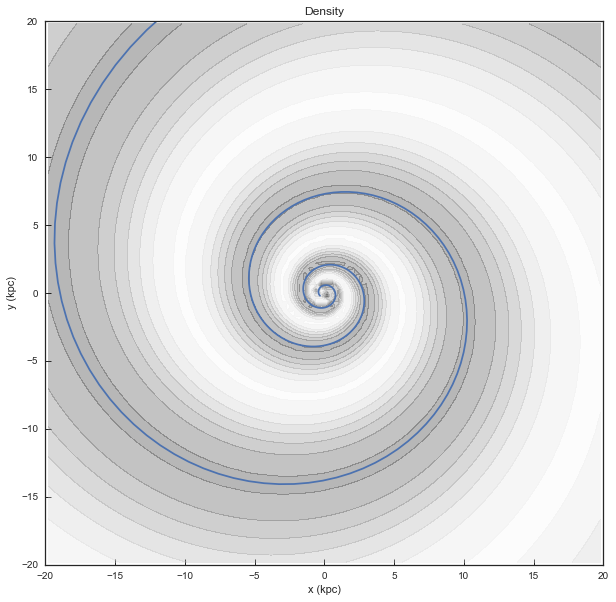

In [91]:
plt_sp_w_max(1)

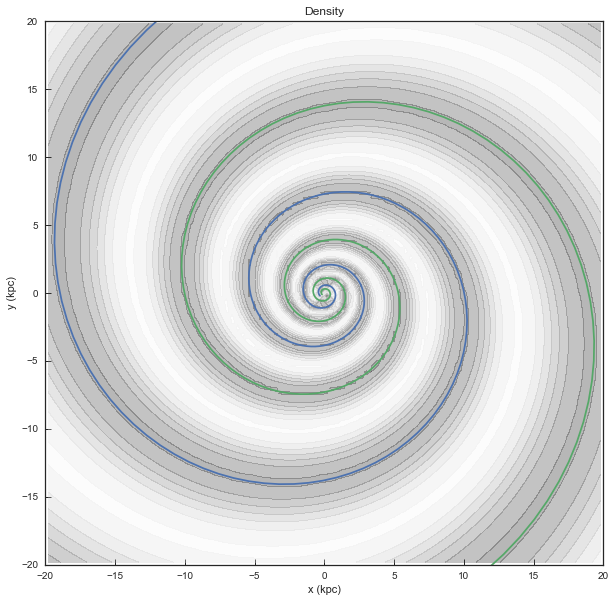

In [92]:
plt_sp_w_max(2)

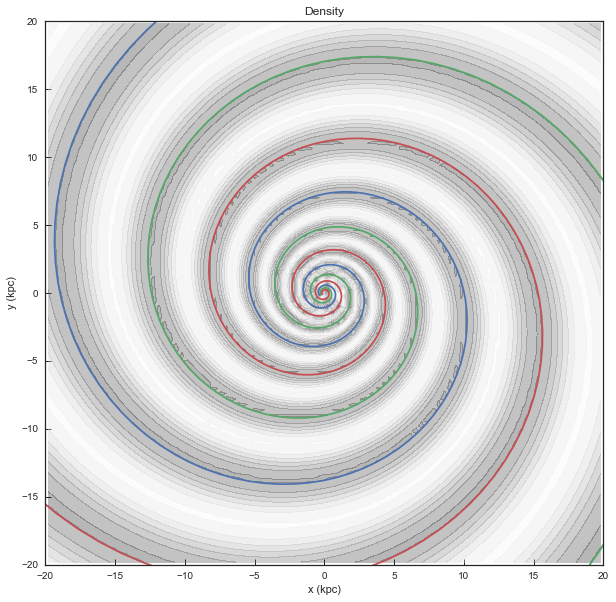

In [93]:
plt_sp_w_max(3)

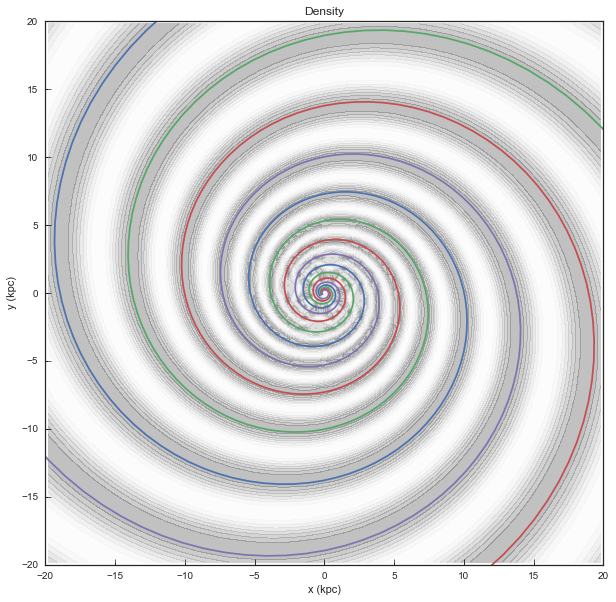

In [94]:
plt_sp_w_max(4)

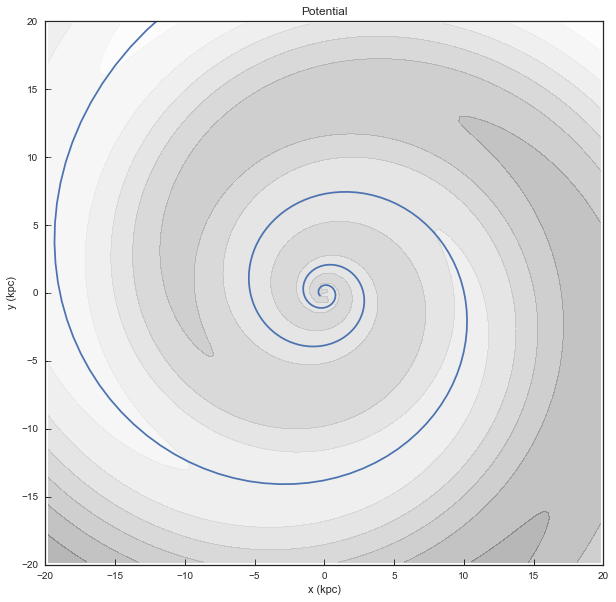

In [95]:
plt_sp_w_max(1, 'pot')

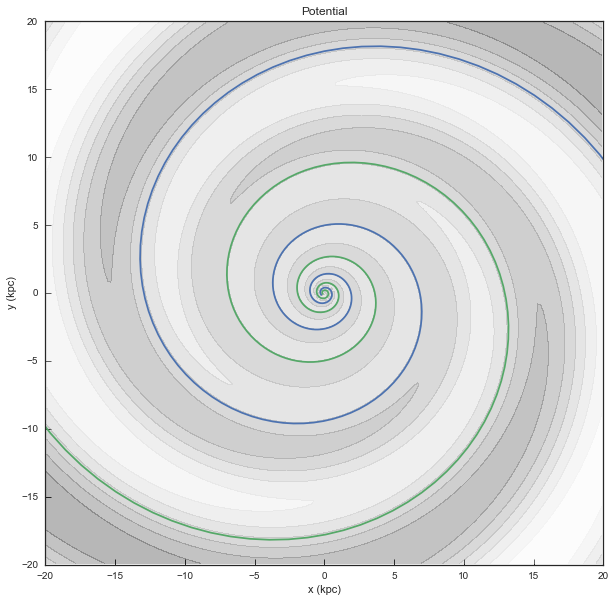

In [10]:
plt_sp_w_max(2, 'pot')

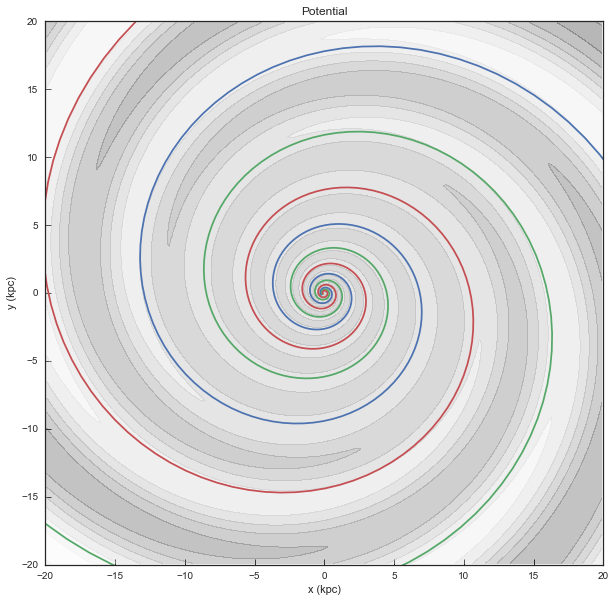

In [11]:
plt_sp_w_max(3, 'pot')

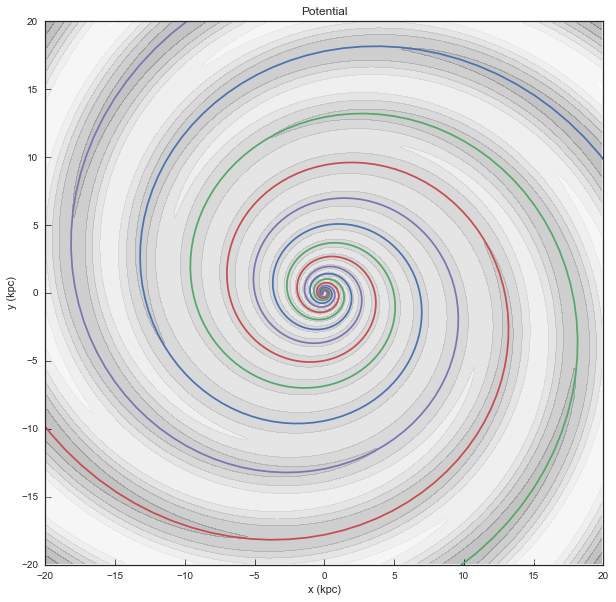

In [12]:
plt_sp_w_max(4, 'pot')

To find the nearest arm from a given point (x, y, z) in galactocentric coordinates (in the x-y plane), we first determine the angle of the radial line to that point, $\theta=arctan(y/x)$. Then, we add $\alpha - \pi/2$ from that angle to find $\phi=\theta + \alpha - \pi/2$. Then, we simply plug $\phi$ into the above equation and find the N different Rs. We then compare the distance between the given point and each of the calculated points and find the closest arm. Alternatively, if it is known which arm the given point belongs to, we can use the appropriate value of N to find the distance to that one arm.

In [13]:
def plot_sp(R):
    N=1
    sp = SpiralArmsPotential(N=N, Rs=np.inf)
    phi = np.linspace(0, 2*np.pi, 300)

    dens_arr = []
    dens_arr2 = []

    def my_func(R, p):
        return sp._rho0 * np.cos(N*(p - np.log(R/sp._R_ref)/np.tan(sp._alpha)))

    for p in phi:
        dens_arr.append(evaluateDensities(sp, R, 0, p))
        dens_arr2.append(my_func(R, p))

    plt.plot(phi, dens_arr)
    plt.plot(phi, dens_arr2)
    plt.show()

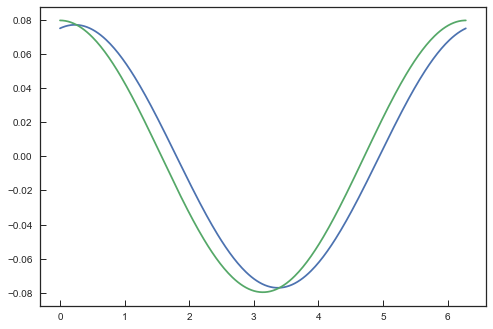

In [14]:
plot_sp(1)

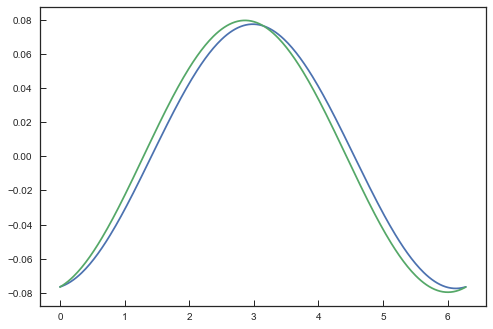

In [15]:
plot_sp(2)

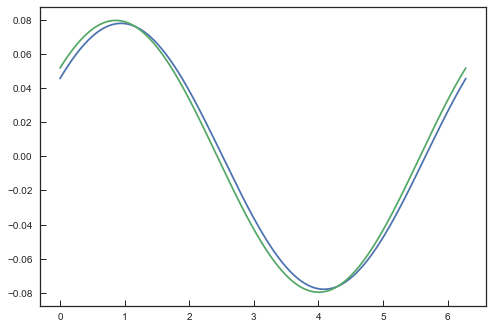

In [16]:
plot_sp(3)

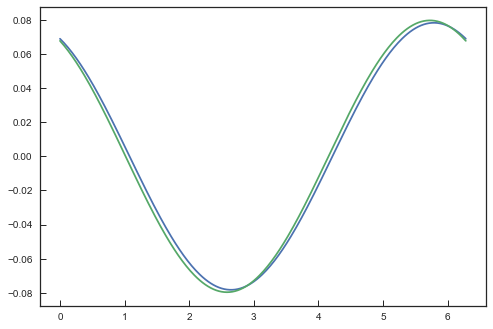

In [17]:
plot_sp(4)

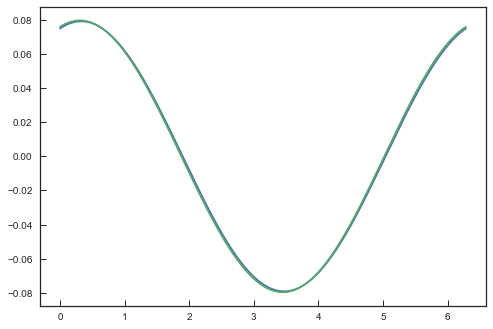

In [18]:
plot_sp(12)